In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')


In [3]:
df.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [4]:
df.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing',
       'insurance', 'mobile_money_classification'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

### VISUALIZATIONS

Text(0.5,1,'Educational Status')

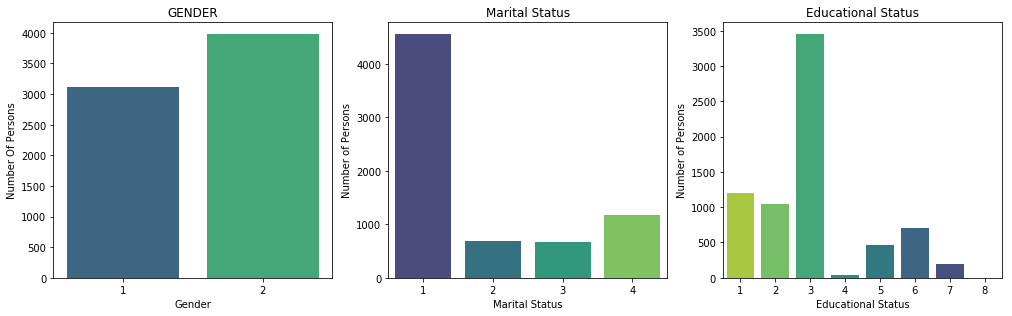

In [6]:
plt.figure(1,figsize=(17,4.7))
plt.subplot(131)
sns.countplot( df['Q2'], palette ='viridis')
plt.xlabel('Gender')
plt.ylabel('Number Of Persons')
plt.title('GENDER') #In the Plot 1 represents MALE and 2, FEMALE

plt.subplot(132)
sns.countplot(df['Q3'], palette ='viridis')
plt.xlabel('Marital Status')
plt.ylabel('Number of Persons')
plt.title('Marital Status') #In marital status plot 1 = Married, 2 = Divorced, 3 = Widowed and 4 = Single/never married


plt.subplot(133)
sns.countplot(df['Q4'], palette ='viridis_r')
plt.xlabel('Educational Status')
plt.ylabel('Number of Persons')
plt.title('Educational Status')


Text(0.5,1,'Savings')

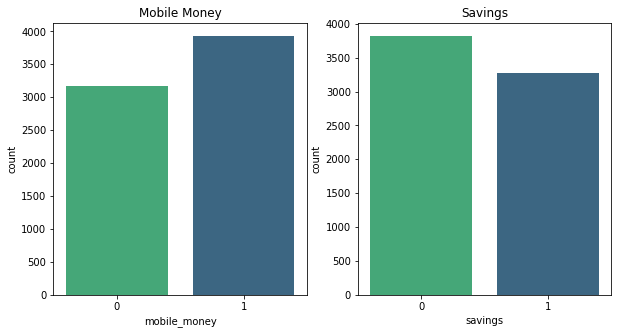

In [7]:
plt.figure(1, figsize=(10,5))
plt.subplot(121)
sns.countplot(df['mobile_money'],palette ='viridis_r')
plt.title('Mobile Money')

plt.subplot(122)
sns.countplot(df['savings'], palette ='viridis_r')
plt.title('Savings')

#Note that in the below plots 0 rep No and 1 Yes

Let's take it a little step further. Which gender has the highest patronage of the mobile money service? 

Text(0.5,1,'GENDER')

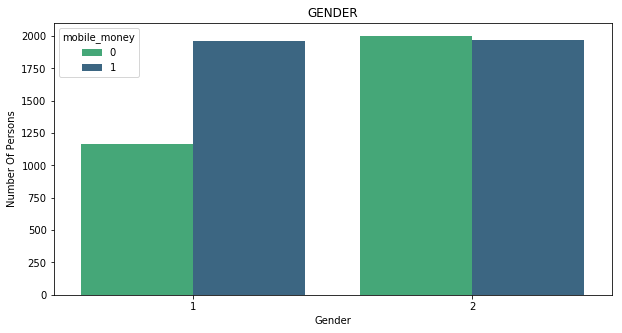

In [8]:
plt.figure(figsize=(10,5))
sns.countplot( df['Q2'], hue=df['mobile_money'], palette ='viridis_r')
plt.xlabel('Gender')
plt.ylabel('Number Of Persons')
plt.title('GENDER') #In the Plot 1 represents MALE and 2, FEMALE

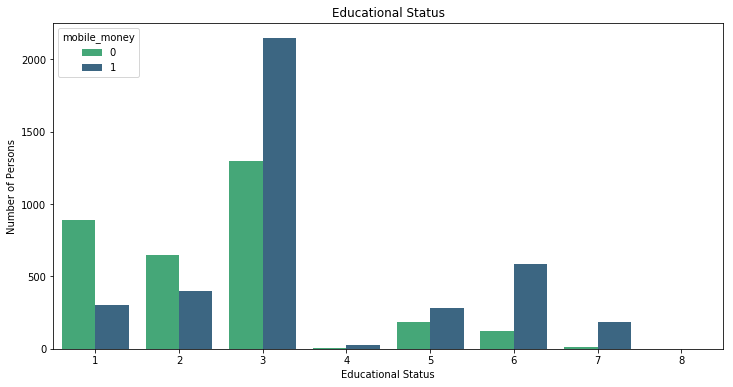

In [9]:
#Plot showing the relationship between the educational status and their patronage of the service.
plt.figure(figsize=(12,6))
sns.countplot(df['Q4'], hue=df['mobile_money'], palette ='viridis_r')
plt.xlabel('Educational Status')
plt.ylabel('Number of Persons')
plt.title('Educational Status')
plt.savefig('Educational Status Vs Mobile Money Patronage')

Text(0.5,1,'Insurance')

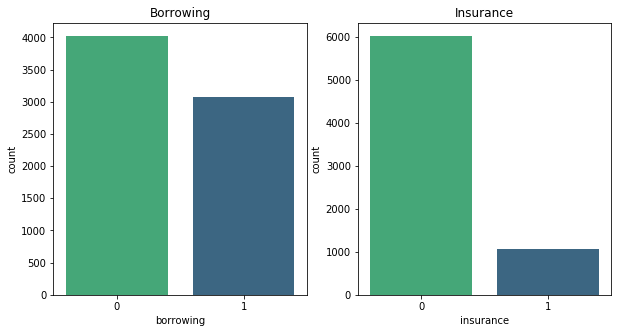

In [10]:
#Plots of the number of persons who borrow and those who don't, plus those who have an insurance and those who don't
plt.figure(2, figsize=(10,5))
plt.subplot(121)
sns.countplot(df['borrowing'], palette ='viridis_r')
plt.title('Borrowing')

plt.subplot(122)
sns.countplot(df['insurance'], palette ='viridis_r')
plt.title('Insurance')

#Note that in the below plots 0 rep No and 1 Yes

In [11]:
matrix = df.corr()
correlation = matrix['mobile_money_classification']
correlation.sort_values(ascending=False).head(11)

mobile_money_classification    1.000000
mobile_money                   0.927591
Q15                            0.542592
Q13                            0.512252
Q16                            0.498239
savings                        0.442081
borrowing                      0.385427
Q4                             0.337340
Q17                            0.281440
insurance                      0.198670
Q8_1                           0.185612
Name: mobile_money_classification, dtype: float64

### MODELLING

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [13]:
df.drop('ID',1, inplace=True)
df.drop('Latitude',1, inplace=True)
df.drop('Longitude',1, inplace=True)
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,...,Q15,Q16,Q17,Q18,Q19,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,98,2,3,1,1,2,2,0,0,0,...,-1,1,-1,4,4,0,0,0,0,0
1,40,1,1,3,5,1,1,1,0,0,...,5,4,4,1,4,1,1,1,0,3
2,18,2,4,6,3,2,1,0,0,0,...,-1,1,-1,1,1,1,0,0,0,2
3,50,1,1,3,1,1,1,0,0,0,...,-1,4,-1,1,4,1,0,1,0,3
4,34,1,1,1,1,2,1,0,1,0,...,1,1,-1,1,4,1,1,0,1,3


In [14]:
#Selecting the dependent nd independent variables
X = df.drop('mobile_money_classification',1)
y = df['mobile_money_classification']
print(X.head())
print(y.shape)

   Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8_1  Q8_2  Q8_3    ...      Q14  Q15  Q16  \
0  98   2   3   1   1   2   2     0     0     0    ...        2   -1    1   
1  40   1   1   3   5   1   1     1     0     0    ...        1    5    4   
2  18   2   4   6   3   2   1     0     0     0    ...        2   -1    1   
3  50   1   1   3   1   1   1     0     0     0    ...        2   -1    4   
4  34   1   1   1   1   2   1     0     1     0    ...        1    1    1   

   Q17  Q18  Q19  mobile_money  savings  borrowing  insurance  
0   -1    4    4             0        0          0          0  
1    4    1    4             1        1          1          0  
2   -1    1    1             1        0          0          0  
3   -1    1    4             1        0          1          0  
4   -1    1    4             1        1          0          1  

[5 rows x 33 columns]
(7094,)


In [15]:
y.value_counts()

3    3126
1    1778
0    1386
2     804
Name: mobile_money_classification, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [17]:
model= SVC(kernel='poly') #use the 'poly' kernel because this is well suited for a multi-class classification case
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 2, ..., 1, 1, 3], dtype=int64)

In [19]:
accuracy_score(y_test, y_pred)

0.9994363021420518